In [ ]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title Code - Load dependencies

# data
import numpy as np
import pandas as pd

# machine learning
import keras
import ml_edu.experiment
import ml_edu.results

# data visualization
import plotly.express as px

In [ ]:
#@title Code - Read dataset
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]
print('Dataset cargado.')

Dataset cargado.


In [27]:
training_df.head(200)

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


In [ ]:
#@title Code - View dataset statistics
training_df.describe(include='all')

26.831666666666667


In [29]:
max_fare = training_df['FARE'].max()
print(f'max fare: ${max_fare:.2f}')

mean_distance = training_df['TRIP_MILES'].mean()
print(f'mean distance: {mean_distance:.4f} miles')

num_cab_companies = training_df['COMPANY'].nunique()
print(f'number of cab companies: {num_cab_companies}')

freq_payment_types = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print(f'most frequent payment type: {freq_payment_types}')

training_df.isnull().sum().sum()

max fare: $159.25
mean distance: 8.2895 miles
number of cab companies: 31
most frequent payment type: Credit Card


np.int64(0)

In [ ]:
#@title Code - View correlation matrix
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [ ]:
#@title Code - View pairplot
px.scatter_matrix(training_df, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

In [40]:
#@title Code - Define ML functions
def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
    """Create and compile a simple linear regression model."""
    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
    concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
    outputs = keras.layers.Dense(units=1)(concatenated_inputs)
    model = keras.Model(inputs=inputs, outputs=outputs)
    # Compile the model topography into code that Keras can efficiently
    # execute. Configure training to minimize the model's mean squared error.
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                    loss="mean_squared_error",
                    metrics=metrics)

    return model

def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
    """Train the model by feeding it data."""

    # Feed the model the feature and the label.
    # The model will train for the specified number of epochs.
    features = {name: dataset[name].values for name in settings.input_features}
    label = dataset[label_name].values
    history = model.fit(x=features,
                        y=label,
                        batch_size=settings.batch_size,
                        epochs=settings.number_epochs)

    return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
    )

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


Epoch 1/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 310.5179 - rmse: 17.6201 
Epoch 2/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 283.8266 - rmse: 16.8469
Epoch 3/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259.9313 - rmse: 16.1216
Epoch 4/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 235.5168 - rmse: 15.3460
Epoch 5/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 214.4673 - rmse: 14.6442
Epoch 6/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195.4937 - rmse: 13.9816
Epoch 7/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177.8969 - rmse: 13.3372
Epoch 8/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157.0859 - rmse: 12.5332
Epoch 9/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141.1707 - rmse: 11.8812
Epoch 10/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.4179 - rmse: 11.2428
Epoch 11/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113.9690 - rmse: 10.6720
Epoch 12/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97.8815 - rmse: 9.8924 
E

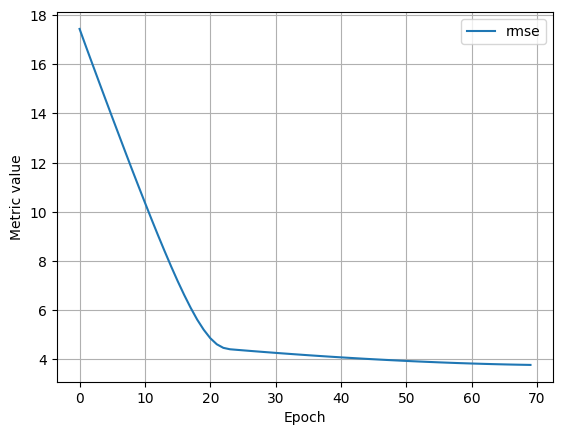

In [ ]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_2 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_2 = create_model(settings_2, metrics)

experiment_2 = train_model('one_feature', model_2, training_df, 'FARE', settings_2)

ml_edu.results.plot_experiment_metrics(experiment_2, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_2, training_df, 'FARE')

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 139.1000 - rmse: 11.7929  
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120.4260 - rmse: 10.9733
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.0559 - rmse: 10.3941
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.1525 - rmse: 9.6509
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82.5851 - rmse: 9.0866
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.9123 - rmse: 8.3610
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.3527 - rmse: 7.7678
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.8027 - rmse: 7.1968
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.6518 - rmse: 6.6815
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.1561 - rmse: 6.0122
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.3036 - rmse: 5.6830
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.6415 - rmse: 5.2564
Epoch 13/20
64/64

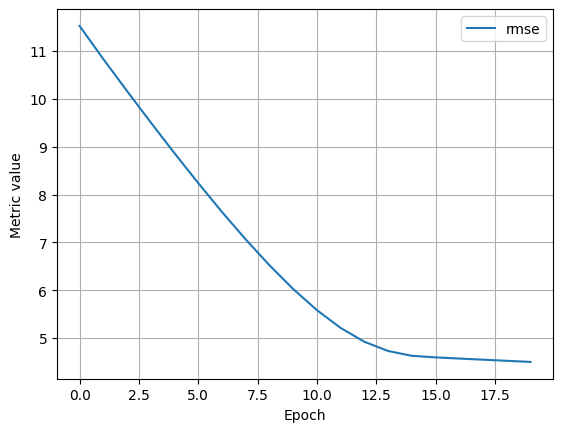

In [ ]:
#@title Code - Experiment 2

# The following variables are the hyperparameters.
settings_2 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 500,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_2 = create_model(settings_2, metrics)

experiment_2 = train_model('one_feature_hyper', model_2, training_df, 'FARE', settings_2)

ml_edu.results.plot_experiment_metrics(experiment_2, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_2, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 472.6450 - rmse: 21.5744
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 66.4089 - rmse: 8.1417
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 40.0981 - rmse: 6.3281
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24.6235 - rmse: 4.9574
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.2019 - rmse: 3.8955
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.2021 - rmse: 3.4828
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.9991 - rmse: 3.4600
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.0159 - rmse: 3.4606
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11.4681 - rmse: 3.3777
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.1364 - rmse: 3.4740
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11.9127 - rmse: 3.4422
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.3185 - rmse: 3.5066

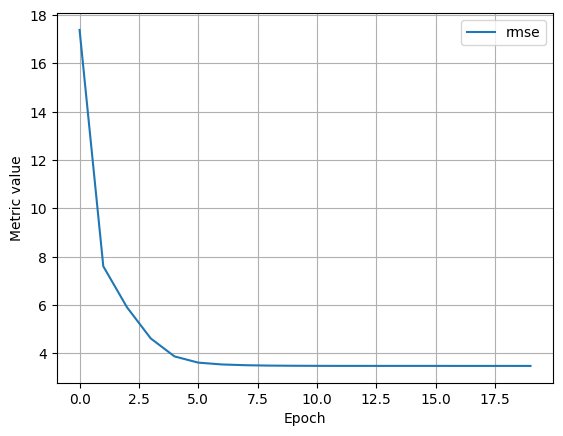

In [68]:
#@title Code - Experiment 3

# The following variables are the hyperparameters.
settings_3 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES', 'TRIP_MINUTES']
)

training_df['TRIP_MINUTES'] = training_df['TRIP_SECONDS'] / 60.0
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_3 = create_model(settings_3, metrics)

experiment_3 = train_model('two_features', model_3, training_df, 'FARE', settings_3)

ml_edu.results.plot_experiment_metrics(experiment_3, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_3, training_df, 'FARE')

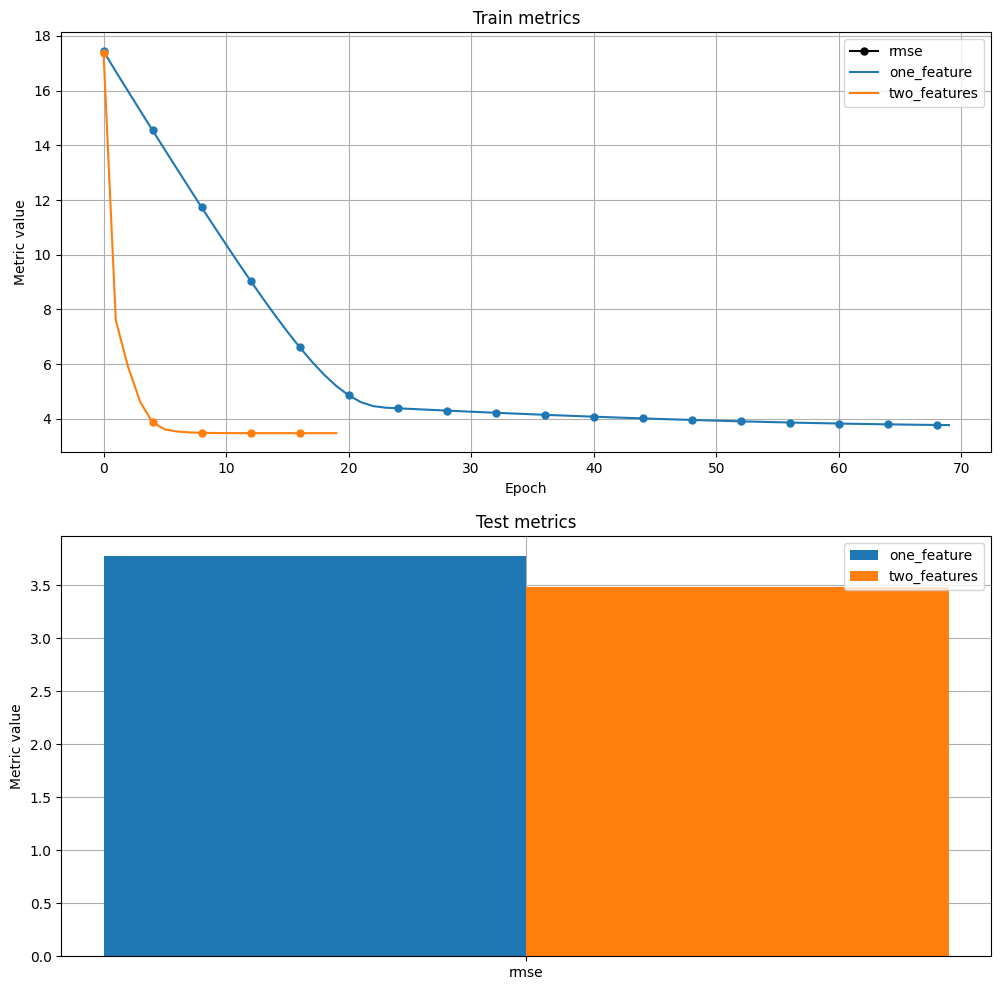

In [69]:
ml_edu.results.compare_experiment([experiment_1, experiment_3], ['rmse'], training_df, training_df['FARE'].values)

In [71]:
#@title Code - Define functions to make predictions
def format_currency(x):
    return "${:.2f}".format(x)

def build_batch(df, batch_size):
    batch = df.sample(n=batch_size).copy()
    batch.set_index(np.arange(batch_size), inplace=True)
    return batch

def predict_fare(model, df, features, label, batch_size=50):
    batch = build_batch(df, batch_size)
    predicted_values = model.predict_on_batch(x={name: batch[name].values for name in features})

    data = {"PREDICTED_FARE": [], "OBSERVED_FARE": [], "L1_LOSS": [],
            features[0]: [], features[1]: []}
    for i in range(batch_size):
        predicted = predicted_values[i][0]
        observed = batch.at[i, label]
        data["PREDICTED_FARE"].append(format_currency(predicted))
        data["OBSERVED_FARE"].append(format_currency(observed))
        data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
        data[features[0]].append(batch.at[i, features[0]])
        data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

    output_df = pd.DataFrame(data)
    return output_df

def show_predictions(output):
    header = "-" * 80
    banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
    print(banner)
    print(output)
    return

In [72]:
#@title Code - Make predictions

output = predict_fare(experiment_3.model, training_df, experiment_3.settings.input_features, 'FARE')
show_predictions(output)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_FARE OBSERVED_FARE L1_LOSS  TRIP_MILES TRIP_MINUTES
0           $8.94         $8.75   $0.19        1.60        12.08
1          $14.66        $14.00   $0.66        4.39        12.50
2          $37.66        $37.00   $0.66       13.40        43.10
3          $40.01        $40.00   $0.01       15.40        32.00
4           $7.14         $6.50   $0.64        1.10         7.00
5          $44.04        $43.75   $0.29       17.65        28.58
6          $22.45        $21.00   $1.45        7.11        27.25
7           $5.93         $5.50   $0.43        0.61         5.60
8           $6.93         $6.25   $0.68        1.06         6.18
9          $13.17        $12.75   $0.42        3.35        16.48
10          $9.79         $9.25   $0.54   